# Imports

In [151]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import naive_bayes, neighbors, tree, model_selection, metrics, preprocessing, datasets
import warnings
warnings.filterwarnings('ignore')

# Functions

In [152]:
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))

def print_metrics(y, y_pred):
    accuracy = metrics.accuracy_score(y, y_pred) * 100
    f1 = metrics.f1_score(y, y_pred, average='macro')
    print("Accuracy: {:0.2f}%".format(accuracy))
    print("F1 Score:", f1)
    return accuracy, f1

def convertToBinary(y, i):
    yCopy = np.copy(y)
    yCopy[yCopy == i] = 100
    yCopy[yCopy != 100] = 0
    yCopy[yCopy == 100] = 1
    return yCopy

def train_test_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print("Training Set")
    print_metrics(y_train, y_train_pred)
    print("Testing Set")
    test_accuracy, test_f1 = print_metrics(y_test, y_test_pred)
    for i in np.unique(y_train):
        y_train_Copy = convertToBinary(y_train, i)
        y_test_Copy = convertToBinary(y_test, i)
        model.fit(x_train, y_train_Copy)
        ax = plt.axes()
        metrics.plot_roc_curve(model, x_test, y_test_Copy, name='Class ' + str(i), ax = ax)
    plt.show()
    print()
    return test_accuracy, test_f1

# Loading Wine dataset and plotting pairwise relations

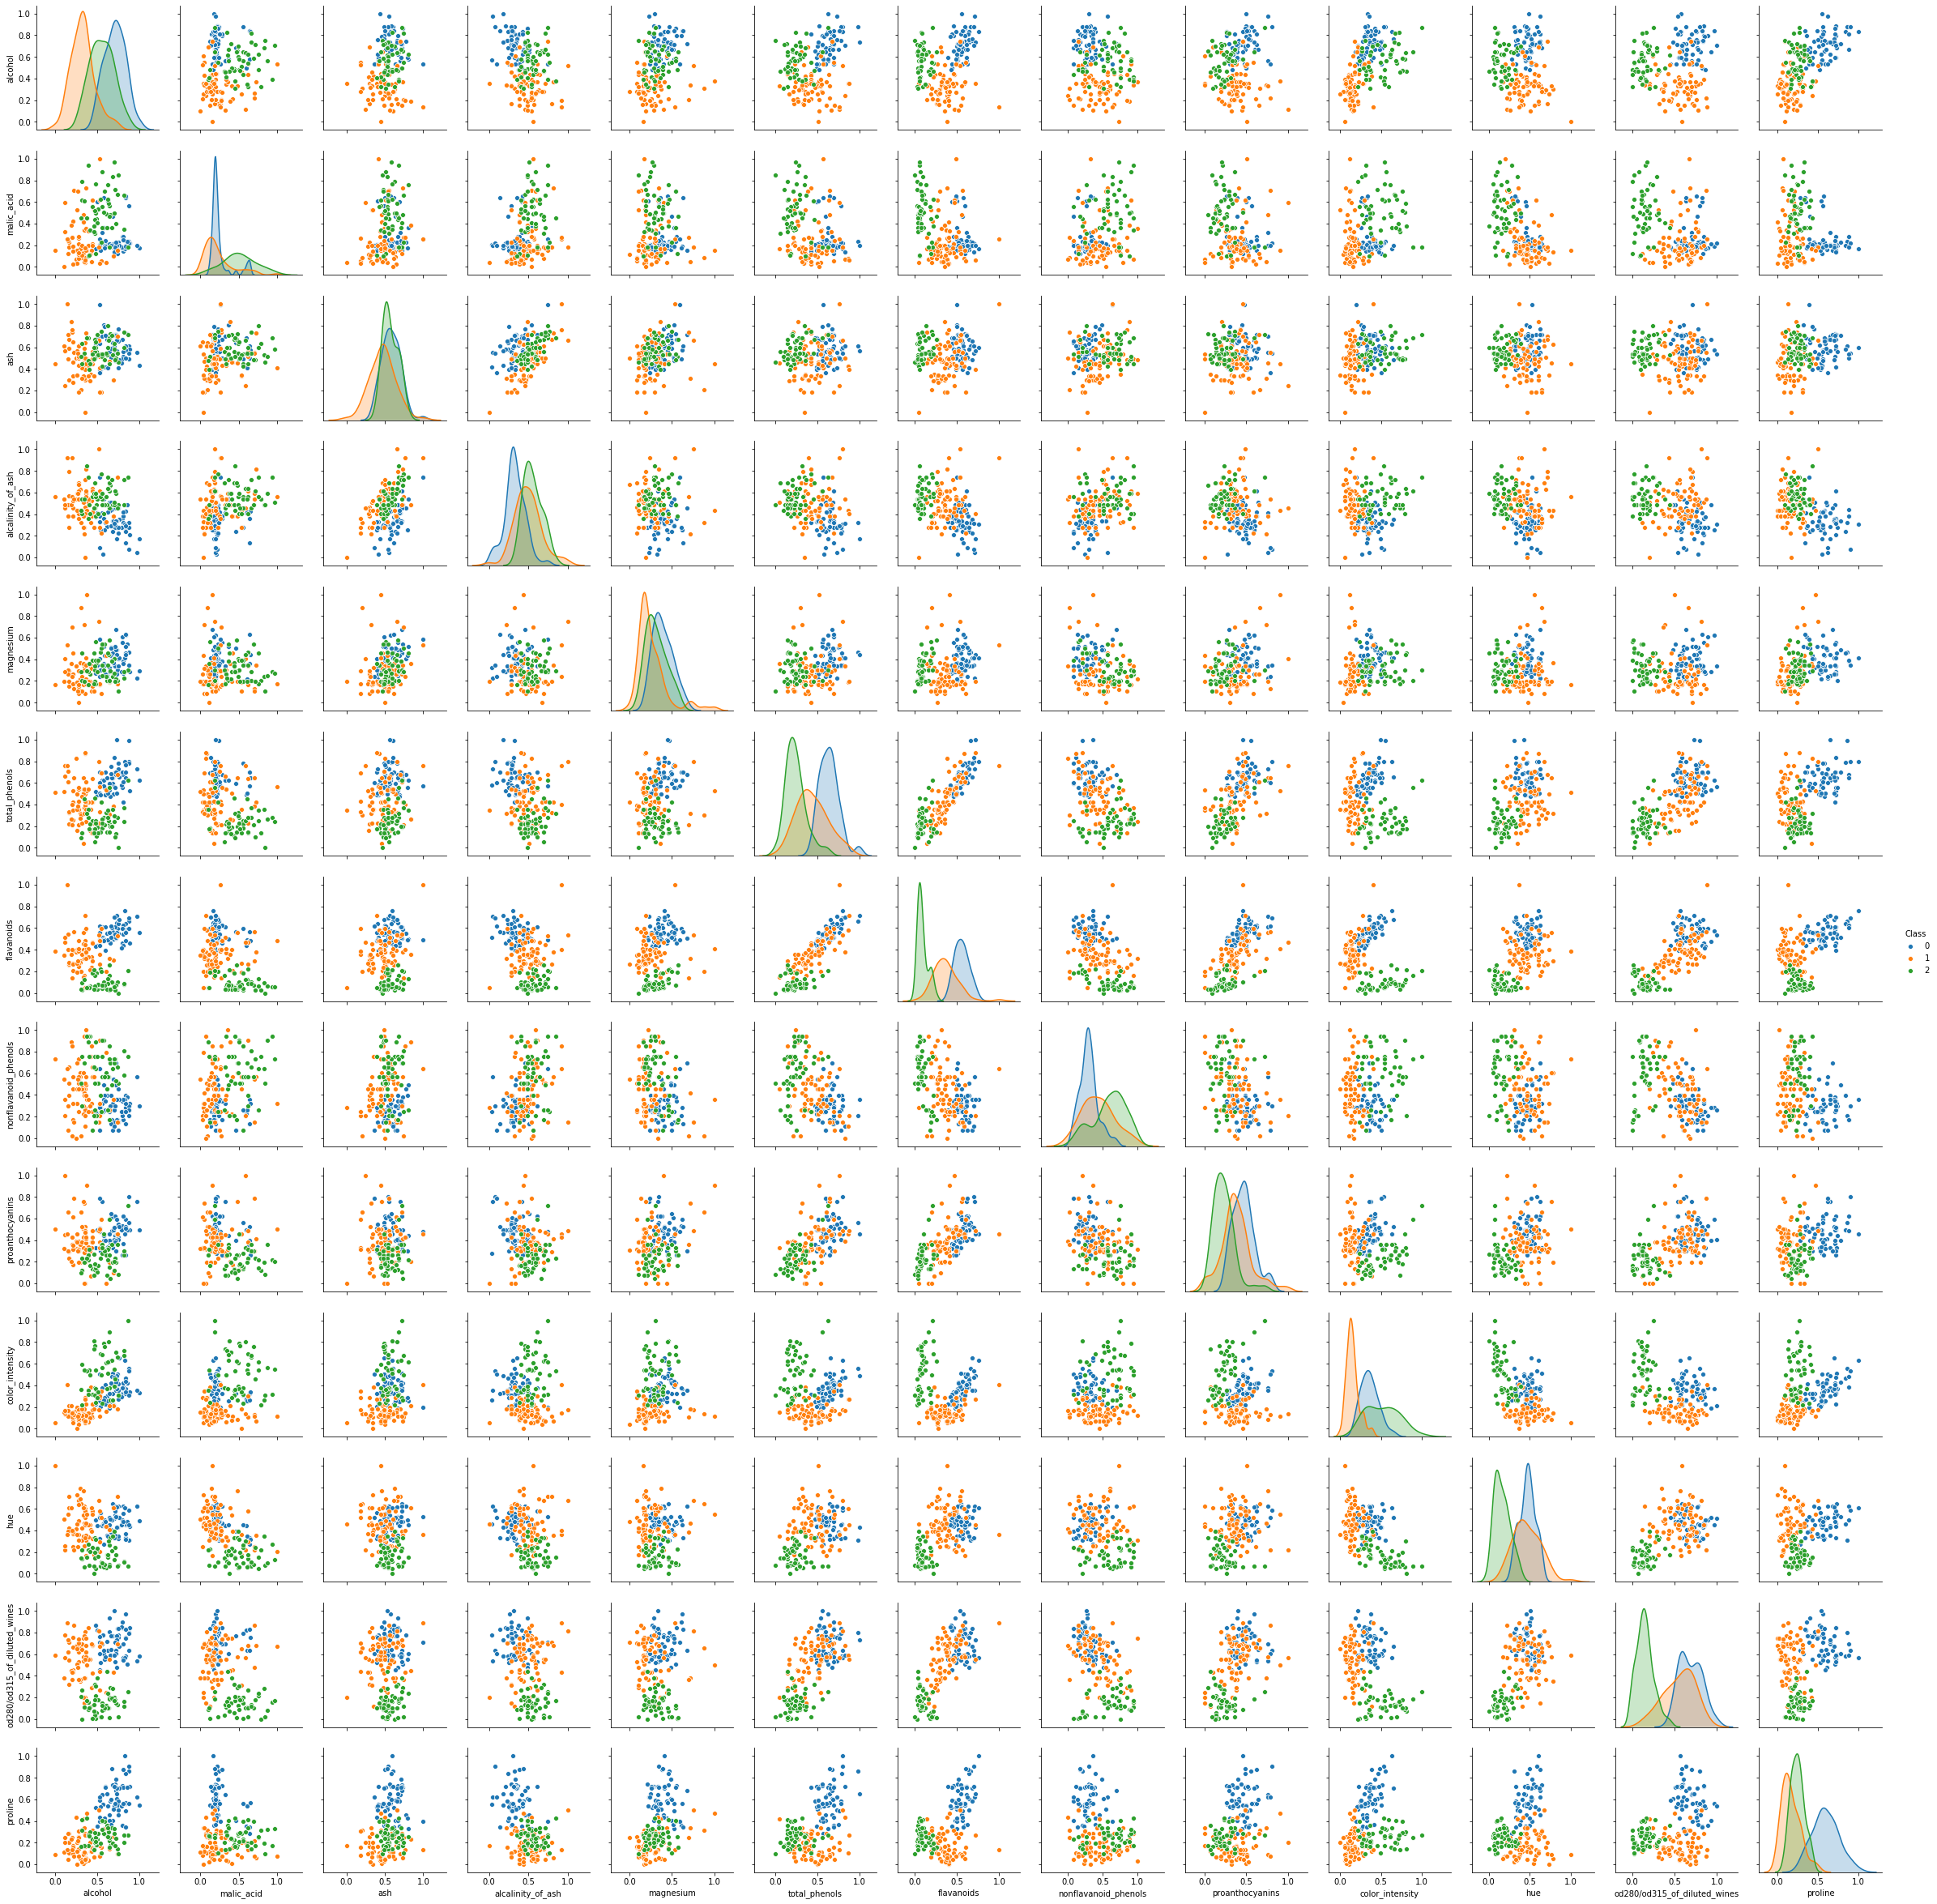

In [153]:
wine = datasets.load_wine()
columns = wine.feature_names
columns.append('Class')
x, y = wine.data, wine.target
x = np.apply_along_axis(normalize, 0, x)
df_wine = pd.DataFrame(np.c_[x, y], columns=columns)
df_wine = df_wine.astype({'Class': 'int'})
sns.pairplot(df_wine, hue='Class')

# Inferences

> - **'total_phenols' and 'flavanoids' have a linear relationship.**  
- **'color_intensity' and 'flavanoids' have a quadratic relationship.**

# Splitting data into training and testing set

In [154]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Gaussian Naive Bayes Classifier on Wine Dataset

Training Set
Accuracy: 96.77%
F1 Score: 0.968529411764706
Testing Set
Accuracy: 100.00%
F1 Score: 1.0


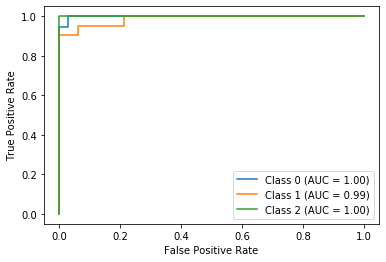

In [155]:
naive_bayes_ = naive_bayes.GaussianNB()
train_test_model(naive_bayes_, x_train, y_train, x_test, y_test)
print()

# Decision Tree Classifier on Wine Dataset

Criterion: Gini
Splitter: Best
Max-depth: 2
Training Set
Accuracy: 93.55%
F1 Score: 0.9398361579240019
Testing Set
Accuracy: 90.74%
F1 Score: 0.9145299145299145


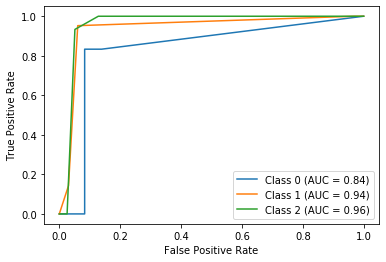


Criterion: Gini
Splitter: Best
Max-depth: 3
Training Set
Accuracy: 99.19%
F1 Score: 0.9925844436295481
Testing Set
Accuracy: 96.30%
F1 Score: 0.9638304224511121


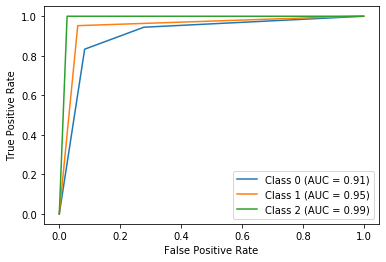


Criterion: Gini
Splitter: Best
Max-depth: 4
Training Set
Accuracy: 100.00%
F1 Score: 1.0
Testing Set
Accuracy: 92.59%
F1 Score: 0.929732688353378


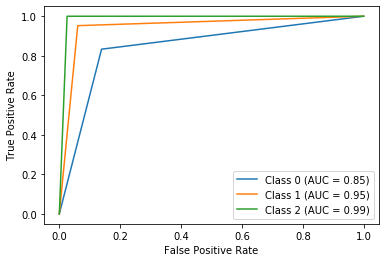


Criterion: Gini
Splitter: Best
Max-depth: 5
Training Set
Accuracy: 100.00%
F1 Score: 1.0
Testing Set
Accuracy: 96.30%
F1 Score: 0.9638304224511121


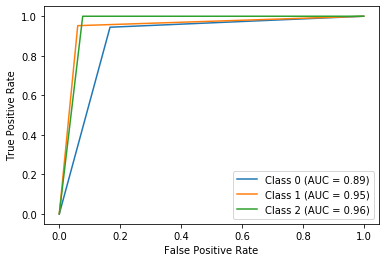


Criterion: Gini
Splitter: Random
Max-depth: 2
Training Set
Accuracy: 90.32%
F1 Score: 0.9036669554033127
Testing Set
Accuracy: 96.30%
F1 Score: 0.9625


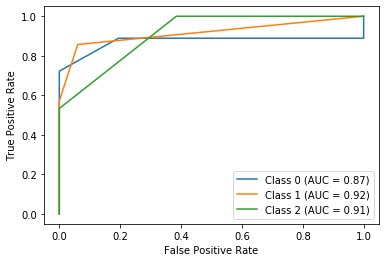


Criterion: Gini
Splitter: Random
Max-depth: 3
Training Set
Accuracy: 94.35%
F1 Score: 0.9440980693352611
Testing Set
Accuracy: 90.74%
F1 Score: 0.9108689334495786


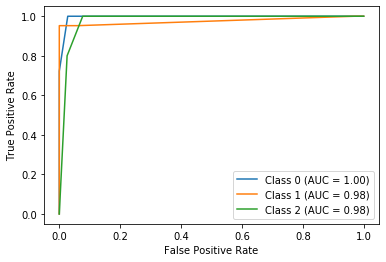


Criterion: Gini
Splitter: Random
Max-depth: 4
Training Set
Accuracy: 91.94%
F1 Score: 0.9165175031154412
Testing Set
Accuracy: 92.59%
F1 Score: 0.9269005847953217


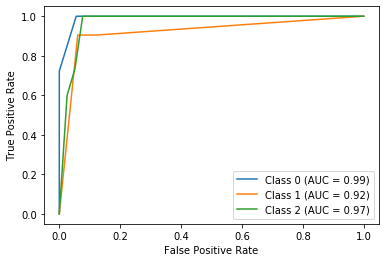


Criterion: Gini
Splitter: Random
Max-depth: 5
Training Set
Accuracy: 97.58%
F1 Score: 0.9767905521895472
Testing Set
Accuracy: 92.59%
F1 Score: 0.9268398268398269


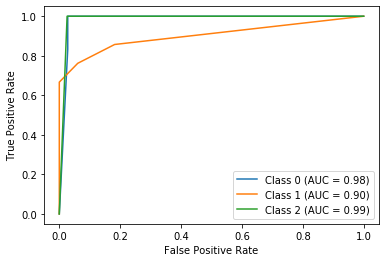


Criterion: Entropy
Splitter: Best
Max-depth: 2
Training Set
Accuracy: 95.97%
F1 Score: 0.9621857883186102
Testing Set
Accuracy: 87.04%
F1 Score: 0.8758221636270417


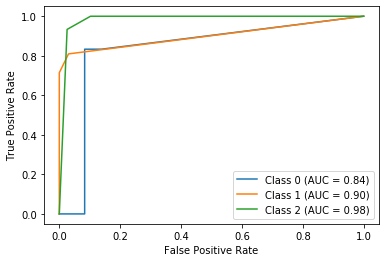


Criterion: Entropy
Splitter: Best
Max-depth: 3
Training Set
Accuracy: 100.00%
F1 Score: 1.0
Testing Set
Accuracy: 92.59%
F1 Score: 0.9289298515104966


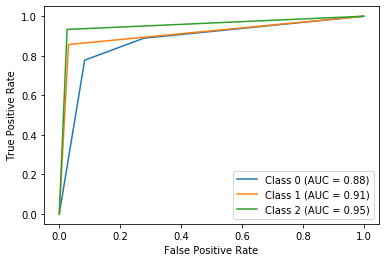


Criterion: Entropy
Splitter: Best
Max-depth: 4
Training Set
Accuracy: 100.00%
F1 Score: 1.0
Testing Set
Accuracy: 90.74%
F1 Score: 0.909944831591173


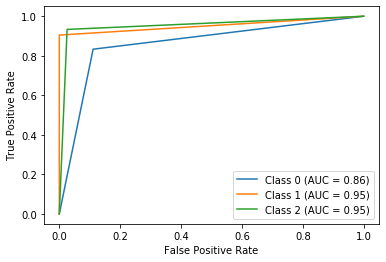


Criterion: Entropy
Splitter: Best
Max-depth: 5
Training Set
Accuracy: 100.00%
F1 Score: 1.0
Testing Set
Accuracy: 90.74%
F1 Score: 0.9104466592838687


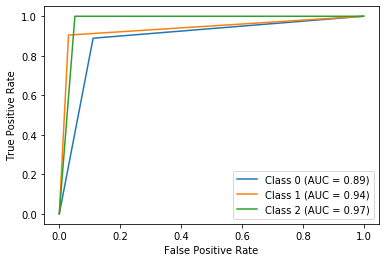


Criterion: Entropy
Splitter: Random
Max-depth: 2
Training Set
Accuracy: 87.10%
F1 Score: 0.8704509505476468
Testing Set
Accuracy: 85.19%
F1 Score: 0.8497798497798498


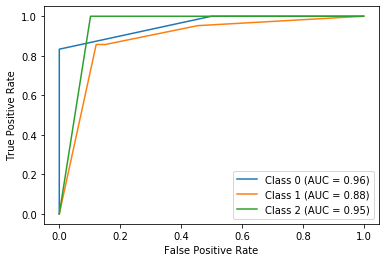


Criterion: Entropy
Splitter: Random
Max-depth: 3
Training Set
Accuracy: 87.90%
F1 Score: 0.8832916549485798
Testing Set
Accuracy: 83.33%
F1 Score: 0.837702708577888


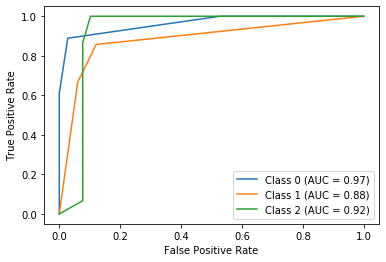


Criterion: Entropy
Splitter: Random
Max-depth: 4
Training Set
Accuracy: 96.77%
F1 Score: 0.9706072351421189
Testing Set
Accuracy: 83.33%
F1 Score: 0.8307778932778932


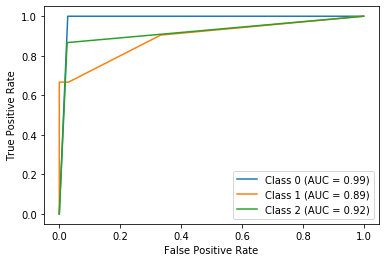


Criterion: Entropy
Splitter: Random
Max-depth: 5
Training Set
Accuracy: 96.77%
F1 Score: 0.9706072351421189
Testing Set
Accuracy: 92.59%
F1 Score: 0.9253995931415288


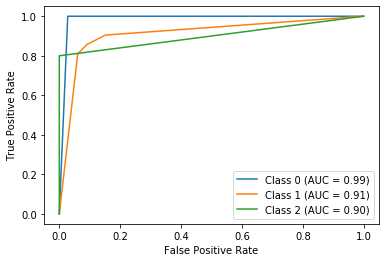


Max Accuracy (96.30%) and Max F1 Score (0.9638304224511121) on test set was obtained with
Criterion: Gini
Splitter: Best
Max-depth: 3


In [158]:
criteria = ['gini', 'entropy']
splitters = ['best', 'random']
depths = np.arange(2, 6)
best_criterion, best_splitter, best_depth = '', '', ''
best_accuracy, best_f1 = -1, -1
for criterion in criteria:
    for splitter in splitters:
        for depth in depths:
            print("Criterion:", criterion.capitalize())
            print("Splitter:", splitter.capitalize())
            print("Max-depth:", depth)
            decision_tree = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=depth)
            test_accuracy, test_f1 = train_test_model(decision_tree, x_train, y_train, x_test, y_test)
            if test_accuracy >= best_accuracy and test_f1 > best_f1:
                best_accuracy = test_accuracy
                best_f1 = test_f1
                best_criterion = criterion
                best_splitter = splitter
                best_depth = depth
print("Max Accuracy ({:0.2f}%) and Max F1 Score ({:}) on test set was obtained with".format(best_accuracy, best_f1))
print("Criterion:", best_criterion.capitalize())
print("Splitter:", best_splitter.capitalize())
print("Max-depth:", best_depth)

# K-Neighbors Classifier on Wine Dataset

Training Set
Accuracy: 98.39%
F1 Score: 0.984206090276427
Testing Set
Accuracy: 96.30%
F1 Score: 0.9625


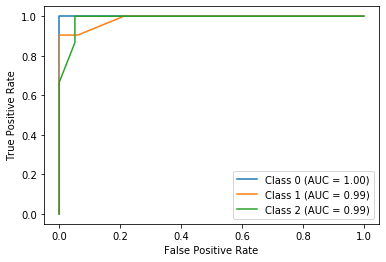

In [157]:
knn = neighbors.KNeighborsClassifier()
train_test_model(knn, x_train, y_train, x_test, y_test)
print()

# Conclusion

> - **Since the dataset contains only 178 total samples(70% of which were used for training), the training time is almost negligible(less than 1/60th of a second in the worst case).**
- **Considering Maximum Accuracy and F1 Score obtained on the test set as the evaluation measures, Gaussian Naive Bayes gives the best perfomance.**